<a href="https://colab.research.google.com/github/JosselynChila/PruebaMineria/blob/main/%5BNRC_6262%5D_ChilaJosselyn_MiguelCastillo_PonceBryan_PopQuiz1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Mineria de Datos</header1></center>

Presentado por: Nombres Apellidos - Grupo  <br>
Lider: Nombre Apellido  <br>
Fecha: DD/MM/2022

# Importación de librerias necesarias

In [33]:
#Para esta actividad se importarán las siguientes librerías:
""" IMPORTAR LIBRERIAS """
""" crear dataframes """
import pandas as pd 
""" dividir datos """
from sklearn.model_selection import train_test_split 
""" clasificador de arbol de decision """
from sklearn.tree import DecisionTreeClassifier 
""" encontrar metricas del modelo """
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
"""mostrar graficas personalizadas"""
import seaborn as sn
""" graficar muestra de datos"""
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
""" mostrar arbol de desicion"""
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
"""codificar caracteristicas"""
from sklearn import preprocessing

## Cargar el Dataset

In [2]:
#Código para cargar el Dataset
df = pd.read_csv("USA_cars_datasets.csv")
df.head(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
5,5,5700,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left
6,6,7300,chevrolet,pk,2010,clean vehicle,149050.0,black,1gcsksea1az121133,167753872,georgia,usa,22 hours left
7,7,13350,gmc,door,2017,clean vehicle,23525.0,gray,1gks2gkc3hr326762,167692494,california,usa,20 hours left
8,8,14600,chevrolet,malibu,2018,clean vehicle,9371.0,silver,1g1zd5st5jf191860,167763267,florida,usa,22 hours left
9,9,5250,ford,mpv,2017,clean vehicle,63418.0,black,2fmpk3j92hbc12542,167656121,texas,usa,2 days left


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


## Descripción de la fuente del Dataset

Este conjunto de datos incluye información sobre 28 marcas de vehículos limpios y usados a la venta en EE. UU. Se ensamblaron doce características para cada automóvil en el conjunto de datos. Entre ellas tenemos 2499 datos y contiene 12 caracteristicas tales como: precio, marca, modelo, año, titulo del estado, kilometraje, conversion, lote, estado, país y condición. Se quiere predecir el estado del auto si esta limpios o usado a la venta en EE. UU.

## Explique el problema a resolver. 
Por medio de un algoritmo de arbol de decision con el finde obtener si el vehiculo esta limpio o de seguro de salvamiento, se obtendra la variable objetivo sera la columna de precios y las variales de entrada que se utilizaran las columnas de price, brand, model, year, mileage, color.


## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [10]:
#Transformación de las caracteristicas (mire el apartado Feature engineering del aula virtual)
""" identificar datos faltantes """
df.isnull().sum()

Unnamed: 0      0
price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

In [11]:
label_encoder = preprocessing.LabelEncoder()
df['brand']= label_encoder.fit_transform(df['brand'])
df['model']= label_encoder.fit_transform(df['model'])
df['title_status']= label_encoder.fit_transform(df['title_status'])
df['color']= label_encoder.fit_transform(df['condition'])

In [12]:
df.head(10)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,27,25,2008,0,274117.0,3,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,8,92,2011,0,190552.0,39,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,7,75,2018,0,39590.0,16,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,8,32,2014,0,64146.0,20,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,5,0,2018,0,6654.0,20,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
5,5,5700,7,75,2018,0,45561.0,16,2c4rdgeg9jr237989,167655771,texas,usa,2 days left
6,6,7300,5,86,2010,0,149050.0,20,1gcsksea1az121133,167753872,georgia,usa,22 hours left
7,7,13350,9,32,2017,0,23525.0,18,1gks2gkc3hr326762,167692494,california,usa,20 hours left
8,8,14600,5,71,2018,0,9371.0,20,1g1zd5st5jf191860,167763267,florida,usa,22 hours left
9,9,5250,8,75,2017,0,63418.0,16,2fmpk3j92hbc12542,167656121,texas,usa,2 days left


## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


In [13]:
#Código que responde a la descripción anterior
#Número de instancias en total.
df.shape


(2499, 13)

In [20]:
#Número de atributos de entrada, su significado y tipo.
df.describe()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,lot
count,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2.499000e+03,2499.000000,2.499000e+03
mean,1249.000000,18767.671469,9.750300,50.943177,2016.714286,0.065226,5.229869e+04,19.074030,1.676914e+08
std,721.543484,12116.094936,5.886986,30.771335,3.442656,0.246974,5.970552e+04,10.101354,2.038772e+05
min,0.000000,0.000000,0.000000,0.000000,1973.000000,0.000000,0.000000e+00,0.000000,1.593488e+08
25%,624.500000,10200.000000,7.000000,32.000000,2016.000000,0.000000,2.146650e+04,16.000000,1.676253e+08
50%,1249.000000,16900.000000,8.000000,39.000000,2018.000000,0.000000,3.536500e+04,16.000000,1.677451e+08
75%,1873.500000,25555.500000,8.000000,72.000000,2019.000000,0.000000,6.347250e+04,19.000000,1.677798e+08
max,2498.000000,84900.000000,27.000000,126.000000,2020.000000,1.000000,1.017936e+06,46.000000,1.678055e+08


In [14]:
#Número de atributos de entrada, su significado y tipo.
df['title_status'].describe()

count    2499.000000
mean        0.065226
std         0.246974
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: title_status, dtype: float64

En un par de párrafos haga un resumen de los principales hallazagos encontrados:
En el dataset se encuentran un total de 2499 registros, con 13 columnas, la variable objetivo tiene una media de 0.06 y una desviacion estandar de 0.24.


## División del dataset en datos de entrenamiento y datos de test 

In [26]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.
""" crear lista de caracteristicas """
caracteristicas_x = ['price','brand','model','year','mileage','color']

""" seleccionar variable independiente/matriz de caracteristicas """
X = df[caracteristicas_x]

""" seleccionar varaible dependiente/objetivo/etiqueta """
y = df['title_status']

""" dividir datos en entrenamiento y prueba """
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

""" mostrar datos divididos """
print(X_train, '\n\n', X_test, '\n\n' ,y_train,  '\n\n',y_test)

      price  brand  model  year   mileage  color
137   19500      6      3  2017   31311.0     30
2278   3300     24     32  2013  100225.0     43
1851  10500      8     32  2014  119689.0     11
1563  16500      8     58  2019   36956.0     43
2022  31700      8     32  2015  126708.0     19
...     ...    ...    ...   ...       ...    ...
960   23800      7     14  2019   26443.0     19
905   17300      7     14  2018   42909.0     16
1096   3700      7     32  2014   98699.0     16
235    3650      8     32  2016   68142.0     16
1061  17000      7     12  2019   38817.0      8

[1749 rows x 6 columns] 

       price  brand  model  year  mileage  color
1384  13500      8     46  2018  21592.0     32
620   24002      8     54  2019  16106.0     16
107   18003      5     71  2017  19117.0     13
1781  12100      8     46  2017  32284.0     14
1592  39950      8     50  2019   9278.0     32
...     ...    ...    ...   ...      ...    ...
1268  24400      8    112  2018  49710.0      0


## Modelamiento

In [24]:
#Códo del modelo
""" crear instancia de clasificacion de arbol de decision  """
clf_dtree = DecisionTreeClassifier()

In [27]:
#Entrenamiento
""" entrenar la clasificacion del arbol de decision """
clf_dtree = clf_dtree.fit(X_train,y_train)

In [28]:
#Test
""" obtener predicciones para comprobar con el conjunto de datos de prueba """
y_pred = clf_dtree.predict(X_test)

## Evaluación del Modelo

Construya un o dos párrafos con los principales hallazgos. Cómo está funcionando el modelo? Calidad en los resultados de predicción. 

In [29]:
"""crear funcion para encontrar metricas del modelo """
def encontrar_metricas(y_test,y_pred):
    """ encontrar la precision del general del modelo"""
    accuracy = f"{accuracy_score(y_test, y_pred):.2f}"
    """ encontrar otras metricas con micro-promedio """
    precision_mi = f"{precision_score(y_test, y_pred, average='micro'):.2f}"
    recall_mi = f"{recall_score(y_test, y_pred, average='micro'):.2f}"
    f1score_mi = f"{f1_score(y_test, y_pred, average='micro'):.2f}"
    """ encontrar otras metricas con macro-promedio """
    precision_ma = f"{precision_score(y_test, y_pred, average='macro'):.2f}"
    recall_ma = f"{recall_score(y_test, y_pred, average='macro'):.2f}"
    f1score_ma = f"{f1_score(y_test, y_pred, average='macro'):.2f}"
    return print('Accuracy: '+ accuracy+ '\n\nMICRO\nPrecision: '+precision_mi+ '\nRecall: '+recall_mi+
                 '\nF1-Score: '+f1score_mi +'\n\nMACRO\nPrecision: '+precision_ma+ '\nRecall: '+recall_ma+
                '\nF1-Score: '+f1score_ma)

In [30]:
""" mostrar valores de las metricas encontradas"""
encontrar_metricas(y_test,y_pred)

Accuracy: 0.97

MICRO
Precision: 0.97
Recall: 0.97
F1-Score: 0.97

MACRO
Precision: 0.91
Recall: 0.87
F1-Score: 0.89


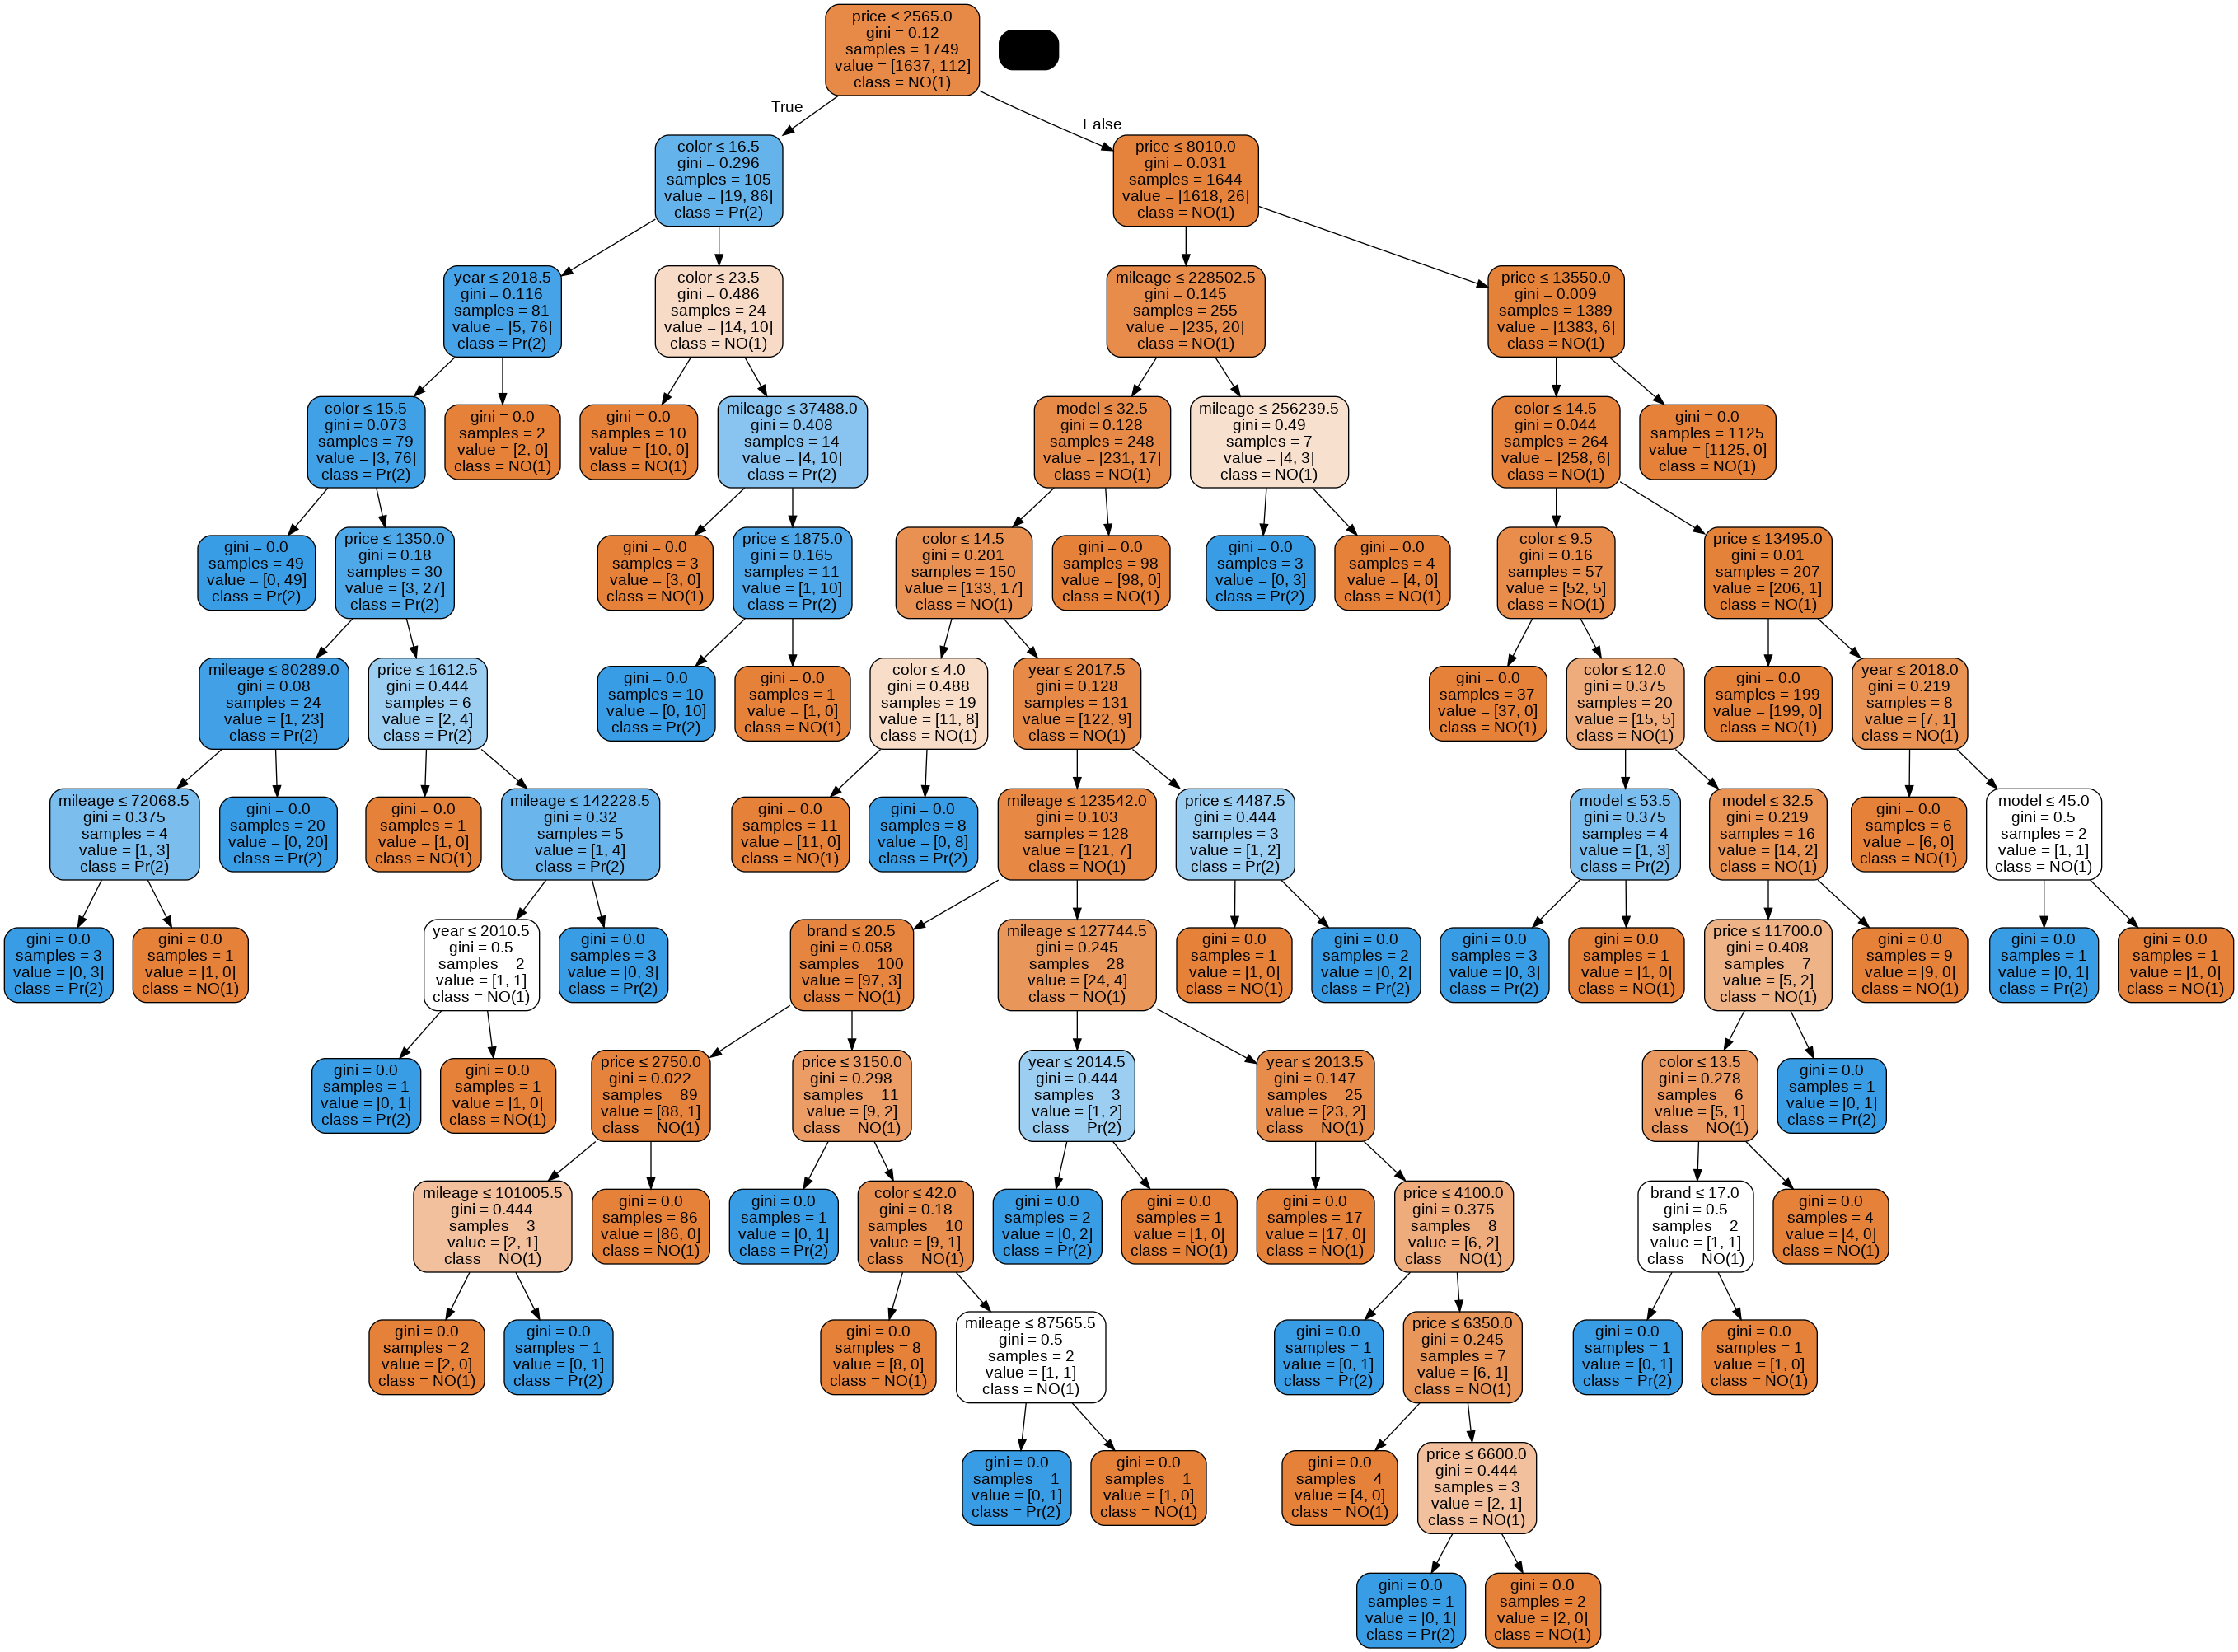

In [41]:
""" objeto de salida de archivos """
dot_data = StringIO()
""" modulo para exportar datos en el grafico del arbol de decision"""
export_graphviz(clf_dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = caracteristicas_x,
                class_names=['NO(1)','Pr(2)','YES(3)'])
""" crear grafico del arbol """
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
"""guardar imagen del arbol """
graph.write_png('decisiontree.png')
Image(graph.create_png())

In [39]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[692,   7],
       [ 13,  38]])

Text(30.5, 0.5, 'ACTUAL')

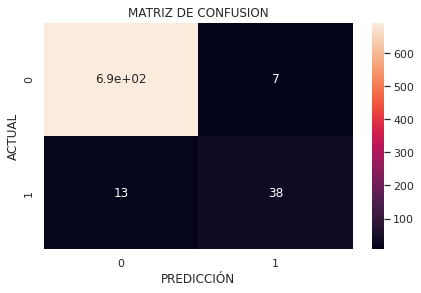

In [38]:

sn.set()
f, ax=plt.subplots()
sn.heatmap(cnf_matrix, annot=True, ax=ax)
ax.set_title('MATRIZ DE CONFUSION'), plt.tight_layout()
ax.set_xlabel('PREDICCIÓN')
ax.set_ylabel('ACTUAL')

# Interpretación de Resultados